Esse trabalho é um estudo sobre duas tecnicas de decomposição matrizes: SVD e PCA.

Para realizar esse estudo será utilizado uma parte do banco de dados MNIST, que é composto por imagens de numeros escritos à mão. 

## 1) Lendo o arquivo *dados.npy* e salvando na matrix X

In [2]:
import numpy as np
import matplotlib.pyplot as pp

#1: Lendo o arquivo dados.npy
X = np.load('dados.npy')

## 2) Imprimindo os três primeiros dígitos de X

Text(0.5, 1.0, 'Digito 3')

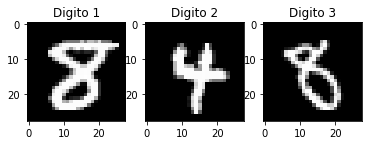

In [58]:
dig0 = np.reshape(X[0],(28,28))
dig1 = np.reshape(X[1],(28,28))
dig2 = np.reshape(X[2],(28,28))

f, axarr = pp.subplots(1,3)

axarr[0].imshow(dig0, cmap='gray')
axarr[0].set_title("Digito 1")
axarr[1].imshow(dig1, cmap='gray')
axarr[1].set_title("Digito 2")
axarr[2].imshow(dig2, cmap='gray')
axarr[2].set_title("Digito 3")

## 3 . Fatoração svd da matriz X.

In [7]:
X_mean = np.mean(X, axis=0)
X_norm = X - np.tile(X_mean,(X.shape[0],1))

In [8]:

U,S,VT = np.linalg.svd(X_norm,full_matrices=True)

print("dim U =", U.shape)
print("dim S =", S.shape)
print("dim VT =", VT.shape)

dim U = (10500, 10500)
dim S = (784,)
dim VT = (784, 784)


In [9]:

U,S,VT = np.linalg.svd(X_norm,full_matrices=False)

print("dim U =", U.shape)
print("dim S =", S.shape)
print("dim VT =", VT.shape)

dim U = (10500, 784)
dim S = (784,)
dim VT = (784, 784)


## 4 PCA

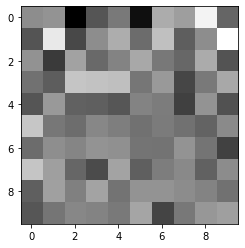

In [14]:
Dados_proj = U[:, :100] @ np.diag(S)[ :100, :100]
Dados_proj.shape
# dig2 = np.reshape(Dados_proj[2],(10,10))
# pp.imshow(dig2, cmap='gray')


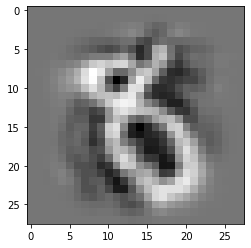

In [15]:
Dados_rec = U[:, :100] @ np.diag(S)[ :100, :100] @ VT[:100, :]
Dados_rec.shape
dig2 = np.reshape(Dados_rec[2],(28,28))
pp.imshow(dig2, cmap='gray')

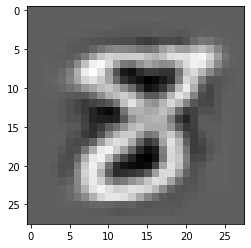

In [16]:
dig0 = np.reshape(Dados_rec[0],(28,28))
dig1 = np.reshape(Dados_rec[1],(28,28))
dig2 = np.reshape(Dados_rec[2],(28,28))

f, axarr = pp.subplots(1,3)

axarr[0].imshow(dig0, cmap='gray')
axarr[0].set_title("Digito 1 -  Rec")
axarr[1].imshow(dig1, cmap='gray')
axarr[1].set_title("Digito 2 -  Rec")
axarr[2].imshow(dig2, cmap='gray')
axarr[2].set_title("Digito 3 -  Rec")

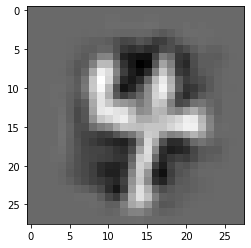

In [17]:
dig2 = np.reshape(Dados_rec[1],(28,28))
pp.imshow(dig2, cmap='gray')

## 6 - 3 primeiros eigen-dígitos

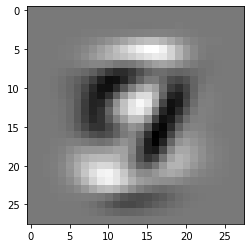

In [52]:
EingV_1 = np.reshape(VT[1],(28,28))
pp.imshow(EingV_1, cmap='gray')


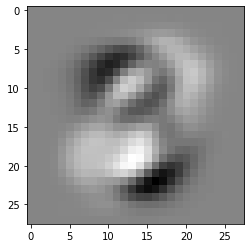

In [53]:
EingV_2 = np.reshape(VT[2],(28,28))
pp.imshow(EingV_2, cmap='gray')

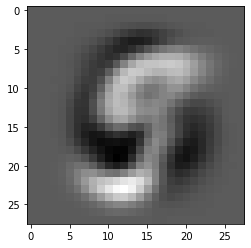

In [54]:
EingV_3 = np.reshape(VT[3],(28,28))
pp.imshow(EingV_3, cmap='gray')

## 7 Decidindo o número de dimensões

In [18]:
S_1 = S[S >= 1]

In [19]:
S_1.shape

(671,)

In [20]:
S.shape

(784,)

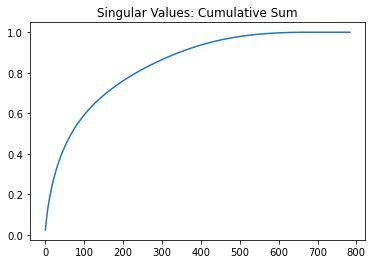

In [21]:
pp.figure(2)
pp.plot(np.cumsum(S)/np.sum((S)))
pp.title('Singular Values: Cumulative Sum')
pp.show()

In [22]:
np.cumsum(S).shape

(784,)

In [43]:
S_cum = np.cumsum(S)

In [44]:
S_80 = S_cum[S_cum < np.sum(S)*0.8]
S_95 = S_cum[S_cum < np.sum(S)*0.95]

In [45]:
print("Eigenvalues < 80% = ", S_80.shape)
print("Eigenvalues < 95% = ", S_95.shape)

Eigenvalues < 80% =  (234,)
Eigenvalues < 95% =  (425,)


In [47]:
print(S_cum[234]/np.sum(S))
print(S_cum[425]/np.sum(S))

0.800455711632801
0.9502576388383309


In [49]:
Dados_rec_80 = U[:, :234] @ np.diag(S)[ :234, :234] @ VT[:234, :]
Dados_rec_95 = U[:, :425] @ np.diag(S)[ :425, :425] @ VT[:425, :]

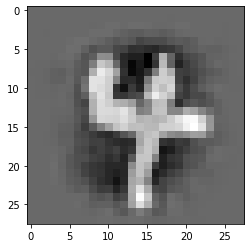

In [50]:
dig2 = np.reshape(Dados_rec_80[1],(28,28))
pp.imshow(dig2, cmap='gray')

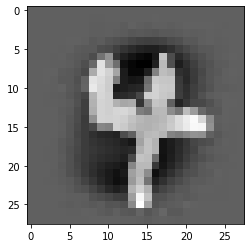

In [51]:
dig2 = np.reshape(Dados_rec_95[1],(28,28))

pp.imshow(dig2, cmap='gray')